# Flying Through Data: A Journey into Airline Insights

## 1. Librairies

In [1]:
#OS
import os

# Dataframes and arrays
import pandas as pd
import numpy as np

# Stats
from scipy import stats 
import math

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import folium
from folium import GeoJson


# Warning 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

## 2. Data Loading

In [2]:
def load_data(path_data_file):

    df = pd.read_csv(path_data_file, encoding = "ISO-8859-1",
                 dtype={'Div1Airport': str, 'Div1TailNum': str, 'Div2Airport': str, 'Div2TailNum': str})
    
    return df

In [3]:
df = load_data(path_data_file = "G:/Mi unidad/Data Science/Portfolio Project/Airline Reporting Carrier On-Time Performance/airline_2m.csv")
df.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
1014168,1989,2,5,18,4,1989-05-18,PI,19822,PI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41516,2008,4,11,21,5,2008-11-21,CO,19704,CO,N15712,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262252,1998,3,7,19,7,1998-07-19,US,20355,US,N507AU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735313,2008,3,7,27,7,2008-07-27,9E,20363,9E,85549E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1291901,2004,1,1,31,6,2004-01-31,WN,19393,WN,N445,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Data Engineering

### a) Add the Airlines names

In [4]:
df_airlines_name = {
    'IATA_CODE_Reporting_Airline': ['NW', 'US', '9E', 'WN', 'YV', 'OO', 'AA', 'DL', 'HP', 'DH', 'UA',
                  'EV', 'MQ', 'TW', 'RU', 'CO', 'F9', 'AS', 'G4', 'OH', 'FL', 'B6',
                  'TZ', 'NK', 'XE', 'PI', 'VX', 'PA', 'AQ', 'EA', 'AL', 'PS', 'YX',
                  'HA', 'ML'],
    'Airline_Name': ['Northwest Airlines', 'US Airways', 'Endeavor Air', 'Southwest Airlines',
                     'Mesa Airlines', 'SkyWest Airlines', 'American Airlines', 'Delta Air Lines',
                     'America West Airlines', 'Independence Air', 'United Airlines',
                     'ExpressJet Airlines', 'American Eagle Airlines', 'Trans World Airlines (TWA)',
                     'SkyKing Turks and Caicos Airways', 'Continental Airlines', 'Frontier Airlines',
                     'Alaska Airlines', 'Allegiant Air', 'Comair', 'AirTran Airways', 'JetBlue Airways',
                     'ATA Airlines', 'Spirit Airlines', 'ExpressJet Airlines (formerly Continental Express)',
                     'Pacific Southwest Airlines (PSA)', 'Virgin America', 'Pan American World Airways (Pan Am)',
                     'Aloha Airlines', 'Eastern Air Lines', 'Aloha Airlines', 'Ukraine International Airlines',
                     'Republic Airlines', 'Hawaiian Airlines', 'Midway Airlines']
}

df_airlines_name = pd.DataFrame(df_airlines_name)
df_airlines_name.head()

,IATA_CODE_Reporting_Airline,Airline_Name
0,NW,Northwest Airlines
1,US,US Airways
2,9E,Endeavor Air
3,WN,Southwest Airlines
4,YV,Mesa Airlines


In [5]:
#Merging the 2 datasets in order to get the name of the Airline in the dataset df

df = df.merge(df_airlines_name, on='IATA_CODE_Reporting_Airline')
df.sample(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Airline_Name
867965,1990,4,10,22,1,1990-10-22,WN,19393,WN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southwest Airlines
691428,1996,1,3,11,1,1996-03-11,CO,19704,CO,N72830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Continental Airlines
993810,2003,1,1,3,5,2003-01-03,WN,19393,WN,N91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southwest Airlines
1201509,2018,3,7,9,1,2018-07-09,AA,19805,AA,N825AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines
191388,2005,4,12,26,1,2005-12-26,MQ,20398,MQ,N687JS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Eagle Airlines
291939,1999,3,8,25,3,1999-08-25,DL,19790,DL,N412DA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines
348368,2011,3,9,12,1,2011-09-12,DL,19790,DL,N931DL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines
1236773,2016,1,2,23,2,2016-02-23,AA,19805,AA,N3FCAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines
1611777,2005,3,9,11,7,2005-09-11,UA,19977,UA,N459UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Airlines
678166,1994,1,2,20,7,1994-02-20,CO,19704,CO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Continental Airlines


### b) Airport names

In [6]:
df_airport_names = pd.read_csv(r'G:\Mi unidad\Data Science\Portfolio Project\Airline Reporting Carrier On-Time Performance\airport-codes_csv.csv', index_col=0)
df_airport_names.sample(5)

,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
ident,,,,,,,,,,,
KEFW,small_airport,Jefferson Municipal Airport,1044.0,NaN,US,US-IA,Jefferson,KEFW,EFW,EFW,"-94.34259796, 42.0102005"
13MI,heliport,Lee Memorial Hospital Heliport,748.0,NaN,US,US-MI,Dowagiac,13MI,NaN,13MI,"-86.11579895019531, 41.983699798583984"
SVCW,small_airport,ChinazÃ³n Airport,98.0,SA,VE,VE-T,NaN,SVCW,NaN,NaN,"-70.93333435058594, 9.326666831970215"
SMPA,small_airport,Vincent Fayks Airport,714.0,SA,SR,SR-SI,Paloemeu,SMPA,OEM,NaN,"-55.442501068115234, 3.3452799320220947"
NZJU,heliport,Wanganui Hospital Heliport,42.0,OC,NZ,NZ-MWT,Wanganui,NZJU,NaN,NaN,"175.03900146484375, -39.94329833984375"


In [7]:
#Filter the column we want to keep :

df_airport_names.drop(['type',	'elevation_ft',	'continent',	'iso_country',	'iso_region',	'gps_code',	'local_code'], axis=1, inplace=True)

#Eliminate the Airport without IATA_CODE
df_airport_names.dropna(inplace=True)

#Change Column title for future merge with df
column_name_mapping = {
    'iata_code': 'Origin',
    'name': 'Airport_Name'
}
df_airport_names.rename(columns=column_name_mapping, inplace=True)

#Create a Column Dest to merge with df
df_airport_names['Dest'] = df_airport_names['Origin']

df_airport_names.sample(10)

,Airport_Name,municipality,Origin,coordinates,Dest
ident,,,,,
KMCF,Mac Dill Air Force Base,Tampa,MCF,"-82.52120209, 27.84930038",MCF
TQPF,Clayton J Lloyd International Airport,The Valley,AXA,"-63.055099, 18.2048",AXA
RJSD,Sado Airport,Sado,SDS,"138.414001465, 38.0601997375",SDS
LESU,Pirineus - la Seu d'Urgel Airport,La Seu d'Urgell Pyrenees and Andorra,LEU,"1.40917, 42.3386",LEU
SLRB,RoborÃ© Airport,RoborÃ©,RBO,"-59.76499938964844, -18.329200744628906",RBO
FGMY,President Obiang Nguema International Airport,MengomeyÃ©n,GEM,"11.024394, 1.685334",GEM
CYHB,Hudson Bay Airport,Hudson Bay,YHB,"-102.310997009, 52.8166999817",YHB
ENSH,SvolvÃ¦r Helle Airport,SvolvÃ¦r,SVJ,"14.669199943542, 68.243301391602",SVJ
PATK,Talkeetna Airport,Talkeetna,TKA,"-150.09399414062, 62.320499420166",TKA


In [8]:
#Merge the Origin Airport
df = df.merge(df_airport_names[['Airport_Name', 'Origin']], on='Origin')

#Change the Column name
df.rename(columns={'Airport_Name' : 'Origin_Airport_Name'}, inplace=True)

df.sample(10)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Airline_Name,Origin_Airport_Name
26434,2019,3,8,9,5,2019-08-09,DL,19790,DL,N925AT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines,Minneapolis-St Paul International/Wold-Chamber...
1402847,1994,4,10,17,1,1994-10-17,DL,19790,DL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines,William P Hobby Airport
338402,1990,2,6,12,2,1990-06-12,WN,19393,WN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southwest Airlines,St Louis Lambert International Airport
609787,1992,2,5,28,4,1992-05-28,HP,19991,HP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,America West Airlines,John Wayne Airport-Orange County Airport
1107979,1989,4,10,28,6,1989-10-28,EA,19707,EA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Air Lines,Hartsfield Jackson Atlanta International Airport
1224241,1994,4,10,17,1,1994-10-17,US,20355,US,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US Airways,Tampa International Airport
1555489,2003,4,10,31,5,2003-10-31,WN,19393,WN,N746,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southwest Airlines,Manchester-Boston Regional Airport
1582427,1999,1,2,18,4,1999-02-18,DL,19790,DL,N913DE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines,Austin Bergstrom International Airport
1932414,2004,2,4,2,5,2004-04-02,MQ,20398,MQ,N858MQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Eagle Airlines,Dubuque Regional Airport
886677,2016,4,12,14,3,2016-12-14,WN,19393,WN,N641SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southwest Airlines,Phoenix Sky Harbor International Airport


In [9]:
#Merge the Destination Airport
df = df.merge(df_airport_names[['Airport_Name', 'Dest']], on='Dest')

#Change the Column name
df.rename(columns={'Airport_Name' : 'Dest_Airport_Name'}, inplace=True)

df.sample(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Airline_Name,Origin_Airport_Name,Dest_Airport_Name
1990594,2009,3,7,22,3,2009-07-22,EV,20366,EV,N841AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ExpressJet Airlines,Hartsfield Jackson Atlanta International Airport,Columbus Metropolitan Airport
9093,2002,1,2,3,7,2002-02-03,UA,19977,UA,N424ä1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Airlines,Chicago O'Hare International Airport,Salt Lake City International Airport
730958,2004,3,7,13,2,2004-07-13,AA,19805,AA,N527AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines,La Guardia Airport,Tampa International Airport
504786,2005,3,9,24,6,2005-09-24,EV,20366,EV,N880AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ExpressJet Airlines,Des Moines International Airport,Cincinnati Northern Kentucky International Air...
1840112,2002,2,4,15,1,2002-04-15,NW,19386,NW,N771NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest Airlines,Eppley Airfield,Minneapolis-St Paul International/Wold-Chamber...
500667,1993,1,3,18,4,1993-03-18,DL,19790,DL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines,William P Hobby Airport,Cincinnati Northern Kentucky International Air...
690941,1996,2,6,15,6,1996-06-15,NW,19386,NW,N204US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest Airlines,Palm Beach International Airport,Detroit Metropolitan Wayne County Airport
239148,1999,1,3,30,2,1999-03-30,TW,20211,TW,N954U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trans World Airlines (TWA),Newark Liberty International Airport,St Louis Lambert International Airport
948438,1995,3,7,7,5,1995-07-07,WN,19393,WN,N682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southwest Airlines,William P Hobby Airport,San Antonio International Airport
333612,2008,1,1,3,4,2008-01-03,EV,20366,EV,N659CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ExpressJet Airlines,Albany International Airport,Hartsfield Jackson Atlanta International Airport


## 4. Exploratory Data Analysis

#### a) Dataset big picture

In [10]:
df.shape

(1999290, 112)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1999290 entries, 0 to 1999289
Columns: 112 entries, Year to Dest_Airport_Name
dtypes: float64(72), int64(18), object(22)
memory usage: 1.7+ GB


In [12]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Airline_Name,Origin_Airport_Name,Dest_Airport_Name
0,1998,1,1,2,5,1998-01-02,NW,19386,NW,N297US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest Airlines,Minneapolis-St Paul International/Wold-Chamber...,Salt Lake City International Airport
1,2003,4,10,6,1,2003-10-06,NW,19386,NW,N376NW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest Airlines,Minneapolis-St Paul International/Wold-Chamber...,Salt Lake City International Airport
2,1995,3,7,18,2,1995-07-18,NW,19386,NW,N295US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest Airlines,Minneapolis-St Paul International/Wold-Chamber...,Salt Lake City International Airport
3,1992,2,6,1,1,1992-06-01,NW,19386,NW,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest Airlines,Minneapolis-St Paul International/Wold-Chamber...,Salt Lake City International Airport
4,2003,2,5,15,4,2003-05-15,NW,19386,NW,N371NW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest Airlines,Minneapolis-St Paul International/Wold-Chamber...,Salt Lake City International Airport


In [13]:
df.tail()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Airline_Name,Origin_Airport_Name,Dest_Airport_Name
1999285,2003,4,11,1,6,2003-11-01,HA,19690,HA,N480HA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hawaiian Airlines,Lanai Airport,Molokai Airport
1999286,2004,2,4,5,1,2004-04-05,HA,19690,HA,N487HA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hawaiian Airlines,Lanai Airport,Molokai Airport
1999287,2020,1,2,12,3,2020-02-12,G4,20368,G4,322NV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Allegiant Air,Orlando Sanford International Airport,Hagerstown Regional Richard A Henson Field
1999288,2020,1,1,17,5,2020-01-17,G4,20368,G4,280NV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Allegiant Air,Orlando Sanford International Airport,Owensboro Daviess County Airport
1999289,2018,1,2,5,1,2018-02-05,G4,20368,G4,869GA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Allegiant Air,Orlando Sanford International Airport,Owensboro Daviess County Airport


Column list :



In [14]:
df['Year'].min()

1987

In [15]:
df['Year'].max()

2020

We have a sample of flights from 1987 to 2020 of 2 million values.

In [16]:
#Checking for duplicated rows

df.duplicated().sum()

0

#### b) Figuring the most interesting columns

In [17]:
df.sample(5)

#Date : Year, Quarter, Month, DayofMonth, DayOfWeek, FlightDate, DepTime

#Airline : IATA_CODE_Reporting_Airline, Reporting_Airline, Airline_Name

#Location : OriginAirportID, OriginCityName, DestStateName, Origin_Airport_Name, Dest_Airport_Name

#Delay : DepDelayMinutes, ArrDelayMinutes

#Cancellation : Cancelled, CancellationCode

#Flight : AirTime, Distance, DistanceGroup

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Airline_Name,Origin_Airport_Name,Dest_Airport_Name
1907116,1991,2,5,9,4,1991-05-09,US,20355,US,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US Airways,Charlotte Douglas International Airport,Tallahassee Regional Airport
1817043,1996,1,1,6,6,1996-01-06,WN,19393,WN,N523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southwest Airlines,Tulsa International Airport,Dallas Love Field
373772,2018,3,8,31,5,2018-08-31,UA,19977,UA,N13718,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Airlines,Newark Liberty International Airport,Portland International Airport
1887790,1991,2,5,3,5,1991-05-03,DL,19790,DL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines,Hartsfield Jackson Atlanta International Airport,Tri-Cities Regional TN/VA Airport
1271774,2016,1,3,22,2,2016-03-22,AA,19805,AA,N664AW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines,General Edward Lawrence Logan International Ai...,Phoenix Sky Harbor International Airport


#### c) Visualization of the flight distance

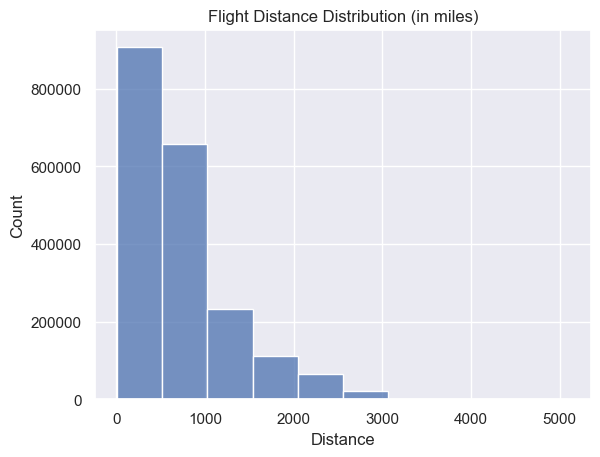

In [18]:
sns.histplot(data = df, x='Distance', bins=10)
plt.title('Flight Distance Distribution (in miles)')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

We observe that most flights cover distances of less than 1000 miles between two airports.

#### c) Visualization of the Elapsed time versus the Distance

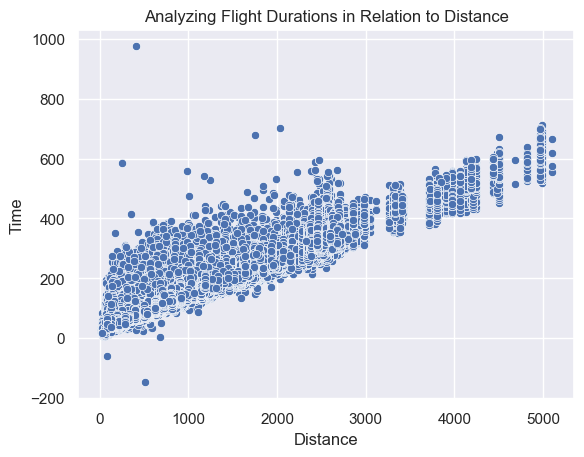

In [19]:
sns.scatterplot(data=df, x='Distance', y='ActualElapsedTime')
plt.title('Analyzing Flight Durations in Relation to Distance')
plt.xlabel('Distance')
plt.ylabel('Time')
plt.show()

We observe a logical relation between flight duration and the distance covered.

#### d) Volume of Domestic flights in the US

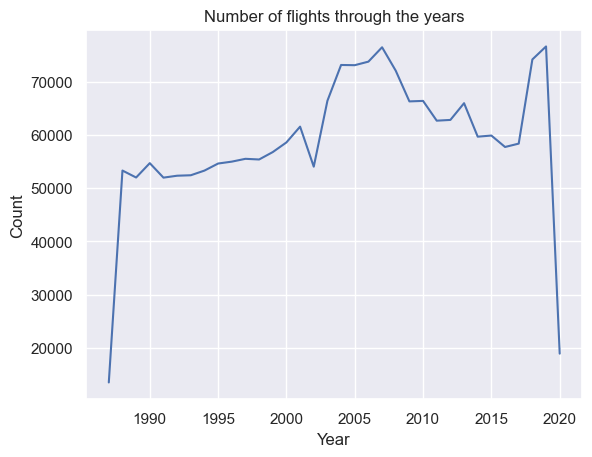

In [20]:
df.groupby('Year')['Flights'].count().plot()
plt.title('Number of flights through the years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

We can observe fluctuations in flight numbers across four different time periods:

1. There was an increase in flights until 2008 when the financial crisis hit.
2. From 2008 to 2017, there was a decrease in the number of flights.
3. Between 2017 and 2019, there was a significant increase in flights.
4. Then, the Coronavirus crisis hit.

#### e) City activity Origin

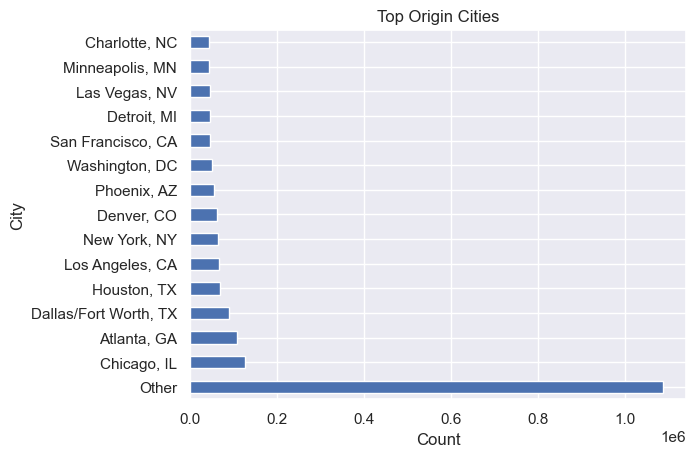

In [21]:
def topn(data, n=14):
    vals = data.value_counts().index[:n]
    return data.where(data.isin(vals), 'Other')

# Creating the horizontal bar plot of delayed flights
(df
 .OriginCityName
 .pipe(topn)
 .value_counts()
 .plot.barh()
 )

# Set labels and title
plt.title('Top Origin Cities')
plt.xlabel('Count')
plt.ylabel('City')

plt.show()

#### f) City activity Destination

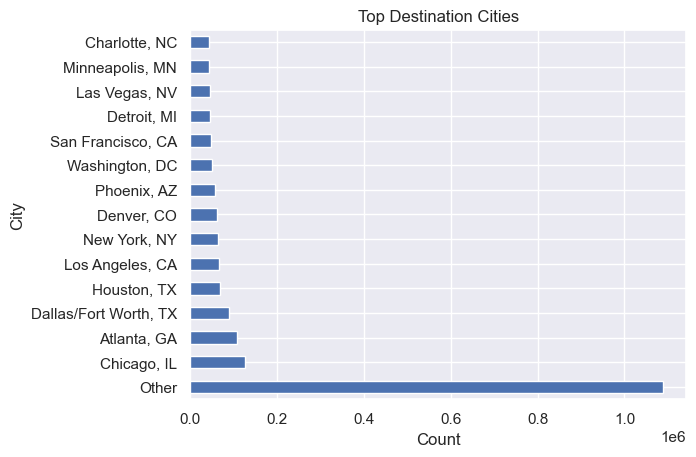

In [22]:
# Creating the horizontal bar plot of delayed flights
(df
 .DestCityName
 .pipe(topn)
 .value_counts()
 .plot.barh()
 )

# Set labels and title
plt.title('Top Destination Cities')
plt.xlabel('Count')
plt.ylabel('City')

plt.show()

We can observe that the top destination cities are the same as the top origin cities.

#### g) Arrival Delay Time 

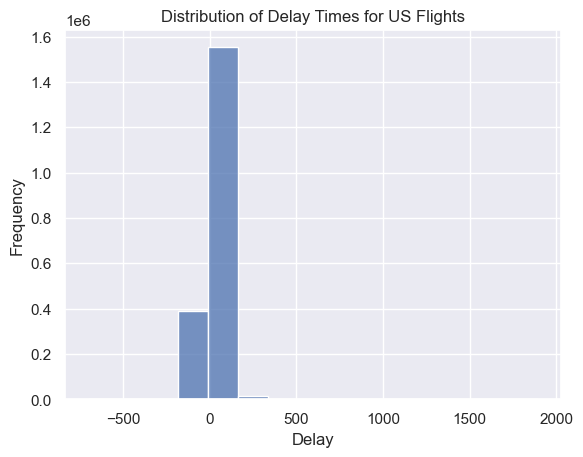

In [23]:
sns.histplot(data=df, x='ArrDelay', bins=15)
plt.title('Distribution of Delay Times for US Flights')
plt.xlabel('Delay')
plt.ylabel('Frequency')
plt.show()

We can observe that the average delay time is approximately 6 minutes. However, this number is subject to interpretation as we consider a flight is delayed (over 15 minuts). In fact, mpst of the flights are on time. Additionally, there are some outliers to consider:

1. Minimum delay is negative about -70 minutes
2. Maximum delay is about 1900 minutes (32 hours)

#### Delay versus On Time flights

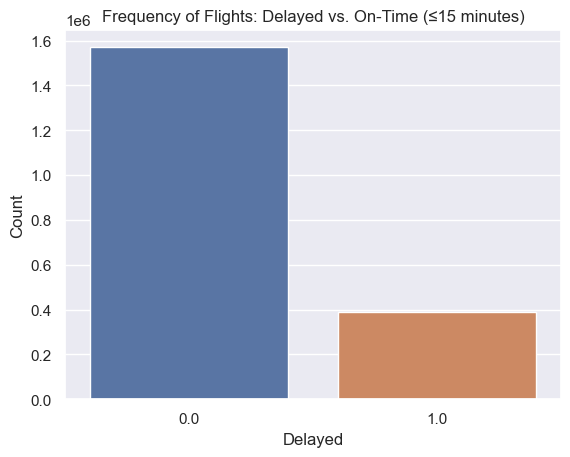

In [24]:
sns.countplot(data=df, x='ArrDel15')
plt.title('Frequency of Flights: Delayed vs. On-Time (≤15 minutes)')
plt.xlabel('Delayed')
plt.ylabel('Count')
plt.show()


In [25]:
df['ArrDel15'].value_counts(normalize=True)

0.0    0.801976
1.0    0.198024
Name: ArrDel15, dtype: float64

We can observe that, ultimately, only 19% of the flights experience a delay of more than 15 minutes in their arrival time. As we saw in 'g,' most of the delays are minimal.

## 5. Delay Probel Observations :

#### a) What are the most impacted Airlines with delays (over 15 minutes)

In [26]:
df['ArrDel15'].value_counts()

0.0    1570452
1.0     387775
Name: ArrDel15, dtype: int64

In [27]:
#We select all the flights with delay

df_delay = df[df['ArrDel15'] == 1]
df_delay.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Airline_Name,Origin_Airport_Name,Dest_Airport_Name
146859,2015,3,9,27,7,2015-09-27,AA,19805,AA,N3CAAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines,Nashville International Airport,Los Angeles International Airport
689635,1993,2,4,4,7,1993-04-04,NW,19386,NW,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest Airlines,Cleveland Hopkins International Airport,Detroit Metropolitan Wayne County Airport
1551559,2001,1,1,6,6,2001-01-06,WN,19393,WN,N755@@,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southwest Airlines,McCarran International Airport,William P Hobby Airport
1219443,1993,1,3,31,3,1993-03-31,AA,19805,AA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines,Ronald Reagan Washington National Airport,Miami International Airport
1947737,2014,2,6,10,2,2014-06-10,MQ,20398,MQ,N618MQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Eagle Airlines,Dallas Fort Worth International Airport,Midland International Airport


In [28]:
df_delay.shape

(387775, 112)

We observe that nearly 400,000 flights experienced delays in this dataset.

Plotting the top 10 Airlines with more flights delayed

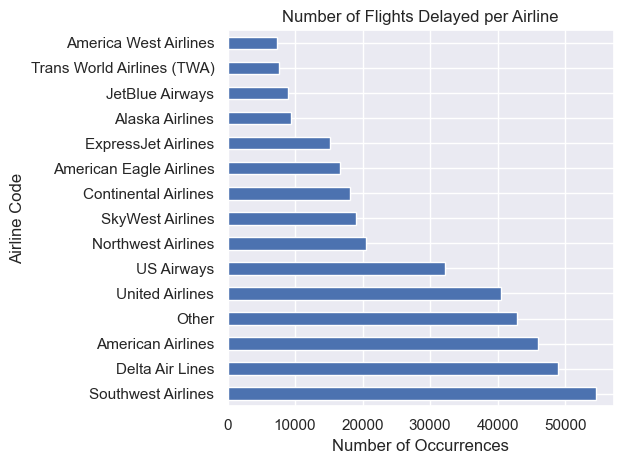

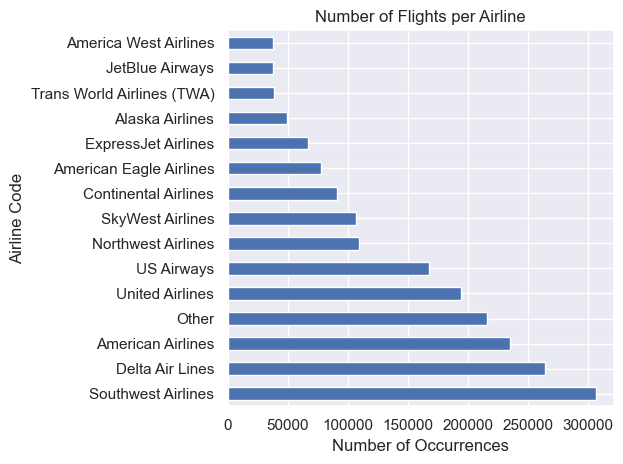

In [29]:
# Creating the horizontal bar plot of delayed flights
ax = (df_delay
 .Airline_Name
 .pipe(topn)
 .value_counts()
 .plot.barh()
 )

# Set titles and labels
ax.set_title('Number of Flights Delayed per Airline')
ax.set_xlabel('Number of Occurrences')
ax.set_ylabel('Airline Code')

plt.tight_layout()  # Ensure proper spacing
plt.show()  # Display the plot

# Creating the horizontal bar plot of delayed flights
ax = (df
 .Airline_Name
 .pipe(topn)
 .value_counts()
 .plot.barh()
 )

# Set titles and labels
ax.set_title('Number of Flights per Airline')
ax.set_xlabel('Number of Occurrences')
ax.set_ylabel('Airline Code')

plt.tight_layout()
plt.show()


We can observe that the more a company flies, the more delayed flights it experiences.

##### b) What is the probability of experiencing a flight delay with each airline?

In [30]:
delay_proba_airlines = (df_delay
 .groupby('Airline_Name')['ArrDel15'].count()/df.groupby('Airline_Name')['ArrDel15'].count()
)
delay_proba_airlines = delay_proba_airlines.reset_index()
delay_proba_airlines


,Airline_Name,ArrDel15
0,ATA Airlines,0.201496
1,AirTran Airways,0.203159
2,Alaska Airlines,0.191316
3,Allegiant Air,0.218472
4,Aloha Airlines,0.189768
5,America West Airlines,0.199319
6,American Airlines,0.200034
7,American Eagle Airlines,0.221734
8,Comair,0.223867
9,Continental Airlines,0.202764


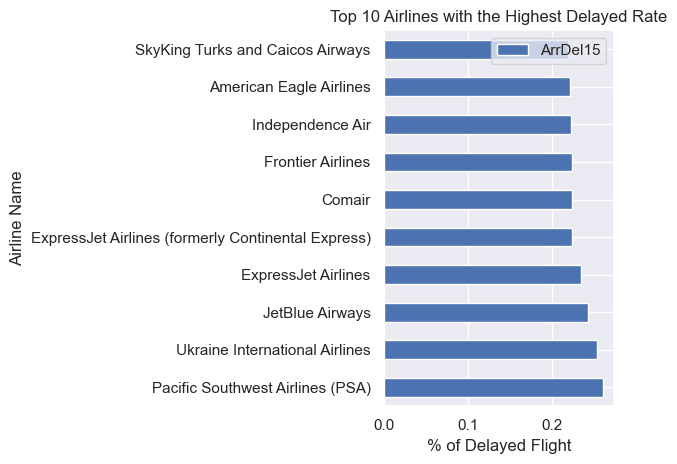

In [31]:
# Creating the horizontal bar plot of Top Delayed Airlines :

ax = (delay_proba_airlines.sort_values(by='ArrDel15', ascending=False).head(10)
 .plot
 .barh(x='Airline_Name', y='ArrDel15')
 )

# Set titles and labels
ax.set_title('Top 10 Airlines with the Highest Delayed Rate')
ax.set_xlabel('% of Delayed Flight')
ax.set_ylabel('Airline Name')

plt.tight_layout()  # Ensure proper spacing
plt.show()  # Display the plotdelay_proba_airlines

We can observe that among the top 15 airlines with the highest propensity for delayed flights, all of them have a delay rate exceeding 20%. The most impacted airline is Pacific Southwest Airlines.

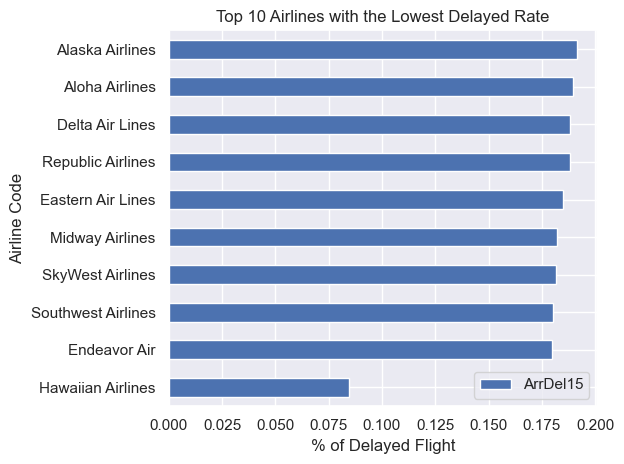

In [32]:
# Creating the horizontal bar plot of Top On-Time Airlines :

ax = (delay_proba_airlines.sort_values(by='ArrDel15', ascending=True).head(10)
 .plot
 .barh(x='Airline_Name', y='ArrDel15')
 )

# Set titles and labels
ax.set_title('Top 10 Airlines with the Lowest Delayed Rate')
ax.set_xlabel('% of Delayed Flight')
ax.set_ylabel('Airline Code')

plt.tight_layout()  # Ensure proper spacing
plt.show()  # Display the plotdelay_proba_airlines

Hawaiian Airlines is the airline with the fewest propension of delayed flight (8%). The rest of the top 15 are above 18%.

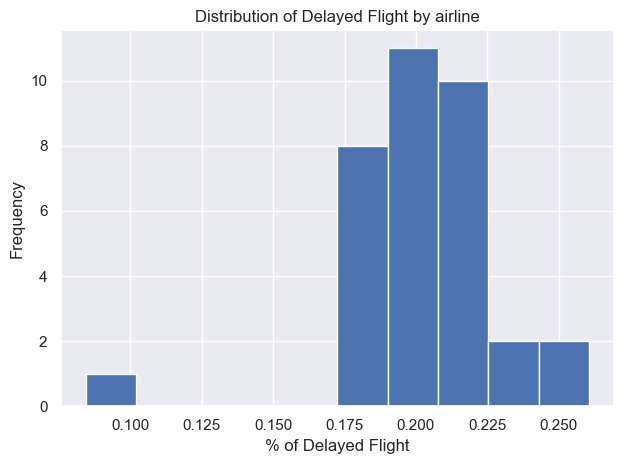

In [34]:
delay_proba_airlines.hist()

# Set titles and labels
plt.title('Distribution of Delayed Flight by airline')
plt.xlabel('% of Delayed Flight')
plt.ylabel('Frequency')

plt.tight_layout()  # Ensure proper spacing
plt.show()  # Display the plotdelay_proba_airlines

We observe that the percentage of delayed flights for all airlines, except for Hawaiian Airlines, falls within the range of 17.5% to 27.5%. This situation is a concern shared by all the airlines. We will now investigate the main reasons causing these delays.

#### c) What are the primary reasons for delays for each airline?

The US Bureau of Transportation Statistics records minutes of delay for five possible causes of flight arrival delays: carrier, weather, NAS, security, and late arrival. 

1. Late Aircraft Delay : Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

2. NAS Delay : Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. Delays that occur after Actual Gate Out are usually attributed to the NAS and are also reported through OPSNET.

3. Security Delay : Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

4. Weather Delay : Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

In [36]:
df_delay_cause = df_delay[['Airline_Name',
         'ArrDel15',
         'ArrDelay',
         'CarrierDelay',
         'WeatherDelay',
         'NASDelay',
         'SecurityDelay',
         'LateAircraftDelay',
         'Origin_Airport_Name',
         'Dest_Airport_Name'
         ]]

df_delay_cause.sample(10)

,Airline_Name,ArrDel15,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Origin_Airport_Name,Dest_Airport_Name
1777400,American Airlines,1.0,72.0,NaN,NaN,NaN,NaN,NaN,Chicago O'Hare International Airport,Tulsa International Airport
1026332,Comair,1.0,128.0,0.0,0.0,23.0,0.0,105.0,Ronald Reagan Washington National Airport,Nashville International Airport
60418,US Airways,1.0,48.0,0.0,0.0,48.0,0.0,0.0,San Diego International Airport,McCarran International Airport
1141431,SkyWest Airlines,1.0,20.0,0.0,0.0,20.0,0.0,0.0,Gerald R. Ford International Airport,Chicago O'Hare International Airport
1457331,Delta Air Lines,1.0,30.0,NaN,NaN,NaN,NaN,NaN,John F Kennedy International Airport,Orlando International Airport
1267035,Southwest Airlines,1.0,50.0,5.0,0.0,0.0,0.0,45.0,Seattle Tacoma International Airport,Phoenix Sky Harbor International Airport
548535,American Airlines,1.0,59.0,59.0,0.0,0.0,0.0,0.0,Louis Armstrong New Orleans International Airport,Dallas Fort Worth International Airport
1455355,Spirit Airlines,1.0,132.0,37.0,0.0,95.0,0.0,0.0,Philadelphia International Airport,Orlando International Airport
680559,Southwest Airlines,1.0,27.0,NaN,NaN,NaN,NaN,NaN,Chicago Midway International Airport,Detroit Metropolitan Wayne County Airport
1822737,Delta Air Lines,1.0,19.0,NaN,NaN,NaN,NaN,NaN,Hartsfield Jackson Atlanta International Airport,Savannah Hilton Head International Airport


We can observe that some rows have no information ("Nan"), so we will add a new column called 'OtherDelay

In [37]:
print('Nan in the df_delay_cause dataset:\n',df_delay_cause.isna().sum(),'\n\n',
      '% of mising rows:\n', df_delay_cause.isna().sum()/len(df_delay_cause)
)

Nan in the df_delay_cause dataset:
 Airline_Name                0
ArrDel15                    0
ArrDelay                    0
CarrierDelay           166086
WeatherDelay           166086
NASDelay               166086
SecurityDelay          166086
LateAircraftDelay      166086
Origin_Airport_Name         0
Dest_Airport_Name           0
dtype: int64 

 % of mising rows:
 Airline_Name           0.000000
ArrDel15               0.000000
ArrDelay               0.000000
CarrierDelay           0.428305
WeatherDelay           0.428305
NASDelay               0.428305
SecurityDelay          0.428305
LateAircraftDelay      0.428305
Origin_Airport_Name    0.000000
Dest_Airport_Name      0.000000
dtype: float64


We observe that 166132 rows have no cause. Around 43%.

In [38]:
#Creating a new Column with a new cause => OtherDelay

df_delay_cause['OtherDelay'] = 0
df_delay_cause.sample(5)

C:\Users\Tanguy\AppData\Local\Temp\ipykernel_22680\1643025987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay_cause['OtherDelay'] = 0


,Airline_Name,ArrDel15,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Origin_Airport_Name,Dest_Airport_Name,OtherDelay
1149882,American Airlines,1.0,29.0,0.0,0.0,29.0,0.0,0.0,Hartsfield Jackson Atlanta International Airport,Chicago O'Hare International Airport,0
491377,Comair,1.0,89.0,89.0,0.0,0.0,0.0,0.0,Eppley Airfield,Cincinnati Northern Kentucky International Air...,0
528741,American Airlines,1.0,26.0,0.0,0.0,26.0,0.0,0.0,John Wayne Airport-Orange County Airport,Dallas Fort Worth International Airport,0
1838094,American Airlines,1.0,35.0,35.0,0.0,0.0,0.0,0.0,Chicago O'Hare International Airport,Minneapolis-St Paul International/Wold-Chamber...,0
1250281,America West Airlines,1.0,16.0,NaN,NaN,NaN,NaN,NaN,McCarran International Airport,Phoenix Sky Harbor International Airport,0


In [39]:
#We select the rows with no information (.isnull()), then we put the minuts of delay from ArrDelay to OtherDelay

df_delay_cause.loc[df_delay_cause['CarrierDelay'].isnull(), 'OtherDelay'] = df_delay_cause['ArrDelay']

#We change the Nan values to 0 :

df_delay_cause.fillna(0, inplace=True)

df_delay_cause.sample(10)


C:\Users\Tanguy\AppData\Local\Temp\ipykernel_22680\2291202994.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay_cause.fillna(0, inplace=True)


,Airline_Name,ArrDel15,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Origin_Airport_Name,Dest_Airport_Name,OtherDelay
872482,SkyWest Airlines,1.0,19.0,19.0,0.0,0.0,0.0,0.0,Portland International Airport,Seattle Tacoma International Airport,0
333321,Delta Air Lines,1.0,24.0,0.0,0.0,0.0,0.0,0.0,Albany International Airport,Hartsfield Jackson Atlanta International Airport,24
325168,AirTran Airways,1.0,164.0,0.0,0.0,1.0,0.0,163.0,Fort Lauderdale Hollywood International Airport,Hartsfield Jackson Atlanta International Airport,0
828914,AirTran Airways,1.0,124.0,0.0,0.0,0.0,0.0,124.0,Newport News Williamsburg International Airport,La Guardia Airport,0
62956,Mesa Airlines,1.0,54.0,0.0,0.0,1.0,0.0,53.0,San Francisco International Airport,McCarran International Airport,0
822341,JetBlue Airways,1.0,18.0,5.0,0.0,13.0,0.0,0.0,Fort Lauderdale Hollywood International Airport,La Guardia Airport,0
1725038,Mesa Airlines,1.0,93.0,93.0,0.0,0.0,0.0,0.0,George Bush Intercontinental Houston Airport,Valley International Airport,0
695424,Delta Air Lines,1.0,16.0,0.0,0.0,16.0,0.0,0.0,Detroit Metropolitan Wayne County Airport,Ronald Reagan Washington National Airport,0
1356013,SkyWest Airlines,1.0,33.0,0.0,0.0,0.0,0.0,33.0,San Francisco International Airport,Tucson International Airport / Morris Air Nati...,0
227900,Trans World Airlines (TWA),1.0,43.0,0.0,0.0,0.0,0.0,0.0,Denver International Airport,St Louis Lambert International Airport,43


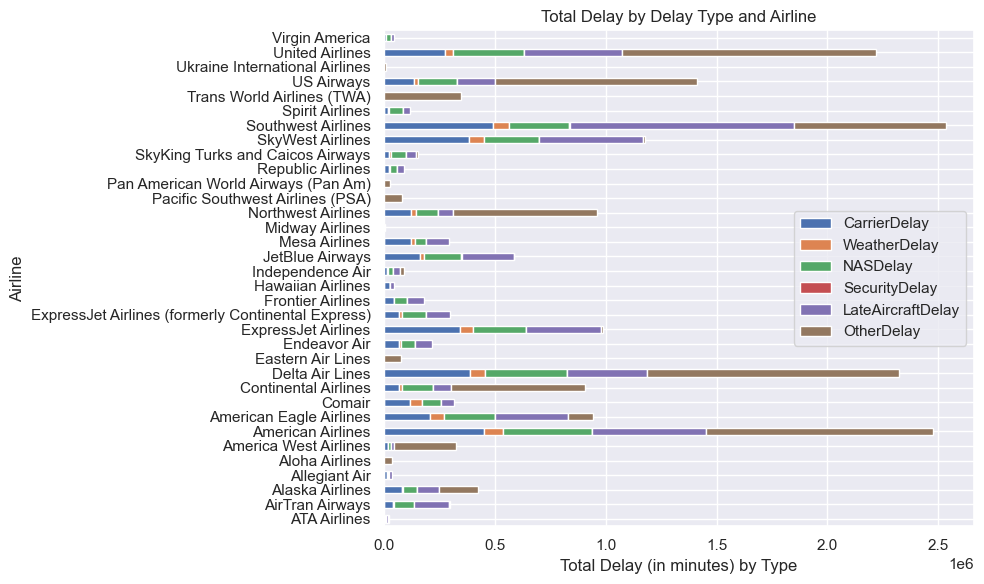

In [40]:
#Create a groupby to get the sum of delay causes per airline
delay_sums = df_delay_cause.groupby('Airline_Name')[['CarrierDelay',	'WeatherDelay',	'NASDelay',	'SecurityDelay',	'LateAircraftDelay',	'OtherDelay']].sum()

# Create the plot
ax = delay_sums.plot.barh(stacked=True,figsize=(10, 6))
ax.set_ylabel('Airline')
ax.set_xlabel('Total Delay (in minutes) by Type')
ax.set_title('Total Delay by Delay Type and Airline')
plt.tight_layout()
plt.show()

#### 6) Relation between airport and delayed flight

#### a) Number of delayed flight per airport

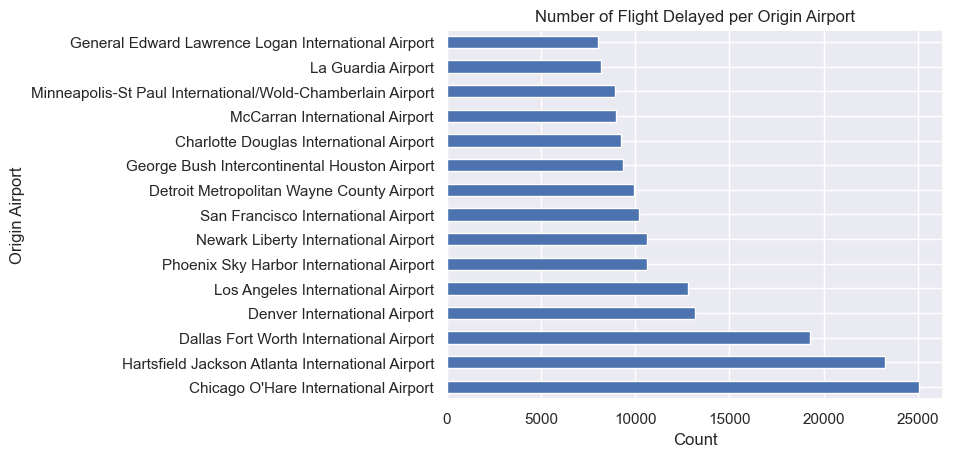

In [41]:
df_delay_cause.groupby('Origin_Airport_Name')['Origin_Airport_Name'].count().sort_values(ascending=False).head(15).plot.barh()
plt.title('Number of Flight Delayed per Origin Airport')
plt.xlabel('Count')
plt.ylabel('Origin Airport')
plt.show()

#### b) What is the probability of a flight being delayed at each airport?

In [42]:
delay_proba_airport = df.groupby('Origin_Airport_Name').agg(sum_ArrDel15=('ArrDel15', sum), count_Flights=('Origin_Airport_Name', 'count'))
delay_proba_airport['%DelayedFlight'] = delay_proba_airport['sum_ArrDel15'] / delay_proba_airport['count_Flights']
delay_proba_airport.sort_values('%DelayedFlight', ascending=True, inplace=True)
delay_proba_airport.tail(10)

,sum_ArrDel15,count_Flights,%DelayedFlight
Origin_Airport_Name,,,
Mobile Downtown Airport,1.0,3,0.333333
Ogden Hinckley Airport,1.0,3,0.333333
Southwest Oregon Regional Airport,29.0,86,0.337209
Nantucket Memorial Airport,26.0,77,0.337662
Unalaska Airport,27.0,79,0.341772
Canyonlands Field,4.0,11,0.363636
Martha's Vineyard Airport,6.0,16,0.375000
Salina Municipal Airport,6.0,16,0.375000
Moore County Airport,2.0,5,0.400000


To be representive we will filter the airport which send a minimum of 300 flights:

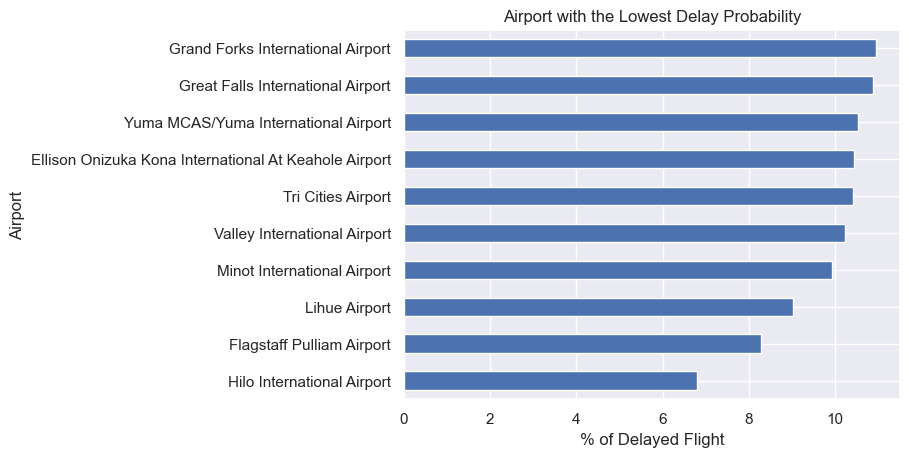

In [43]:
(delay_proba_airport[delay_proba_airport['count_Flights'] >= 300]['%DelayedFlight'].head(10)*100).plot.barh()

plt.title('Airport with the Lowest Delay Probability')
plt.xlabel('% of Delayed Flight')
plt.ylabel('Airport')
plt.show()


We observe that Hilo International Airport in Hawaii has the fewest delayed flights, with less than 7% of flights experiencing delays.

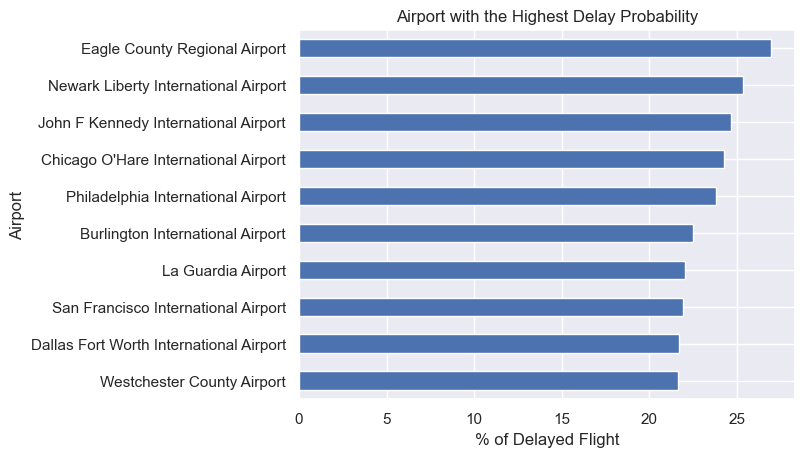

In [49]:
(delay_proba_airport[delay_proba_airport['count_Flights'] >= 300]['%DelayedFlight'].tail(10)*100).plot.barh()

plt.title('Airport with the Highest Delay Probability')
plt.xlabel('% of Delayed Flight')
plt.ylabel('Airport')
plt.show()

We can observe that the main US airports are in the highest delay list. Now, let's figure out:

How the percentage of delayed flights is distributed per airport?
Whether the number of flights and the number of delays are connected?

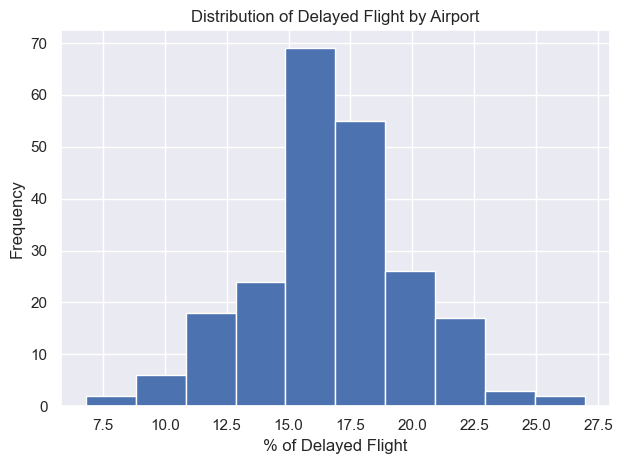

In [50]:
(delay_proba_airport[delay_proba_airport['count_Flights'] >= 300]['%DelayedFlight']*100).hist()

# Set titles and labels
plt.title('Distribution of Delayed Flight by Airport')
plt.xlabel('% of Delayed Flight')
plt.ylabel('Frequency')

plt.tight_layout()  # Ensure proper spacing
plt.show()  # Display the plotdelay_proba_airlines

We observe that the distribution of the percentage of delayed flights per airport appears to be almost normal, centered around 15% to 17.5% delayed flights. The main airports have the highest probability of experiencing delayed arrivals.

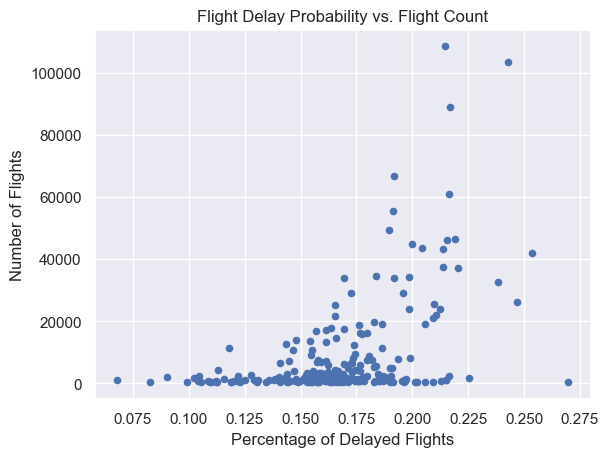

In [45]:
delay_proba_airport[delay_proba_airport['count_Flights'] >= 300].plot.scatter(x='%DelayedFlight', y='count_Flights')

plt.title('Flight Delay Probability vs. Flight Count')
plt.xlabel('Percentage of Delayed Flights')
plt.ylabel('Number of Flights')
plt.show()

Yes, there is a relationship between the probability of a delay and the number of flights received at an airport. As we can see:

1. For airports with above 20,000 flights, the minimum probability is 16%.
2. For airports with above 40,000 flights, the minimum probability is 18%.

#### 7) What are the primary causes of delays at each airport?

In [46]:
#Create a groupby to get the sum of delay causes per airline
delay_sums = df_delay_cause.groupby('Origin_Airport_Name')[['CarrierDelay',	'WeatherDelay',	'NASDelay',	'SecurityDelay', 'LateAircraftDelay', 'OtherDelay']].sum()


In [47]:
delay_sums[['CarrierDelay',	'WeatherDelay',	'NASDelay',	'SecurityDelay', 'LateAircraftDelay', 'OtherDelay']].sum(axis=1).sort_values(ascending=False).head(15)

Origin_Airport_Name
Chicago O'Hare International Airport                          1410251.0
Hartsfield Jackson Atlanta International Airport              1156641.0
Dallas Fort Worth International Airport                        976896.0
Denver International Airport                                   683232.0
Newark Liberty International Airport                           615456.0
Los Angeles International Airport                              596565.0
San Francisco International Airport                            536290.0
Detroit Metropolitan Wayne County Airport                      506961.0
George Bush Intercontinental Houston Airport                   485918.0
Phoenix Sky Harbor International Airport                       465381.0
La Guardia Airport                                             453676.0
Charlotte Douglas International Airport                        443790.0
Minneapolis-St Paul International/Wold-Chamberlain Airport     436216.0
General Edward Lawrence Logan International 

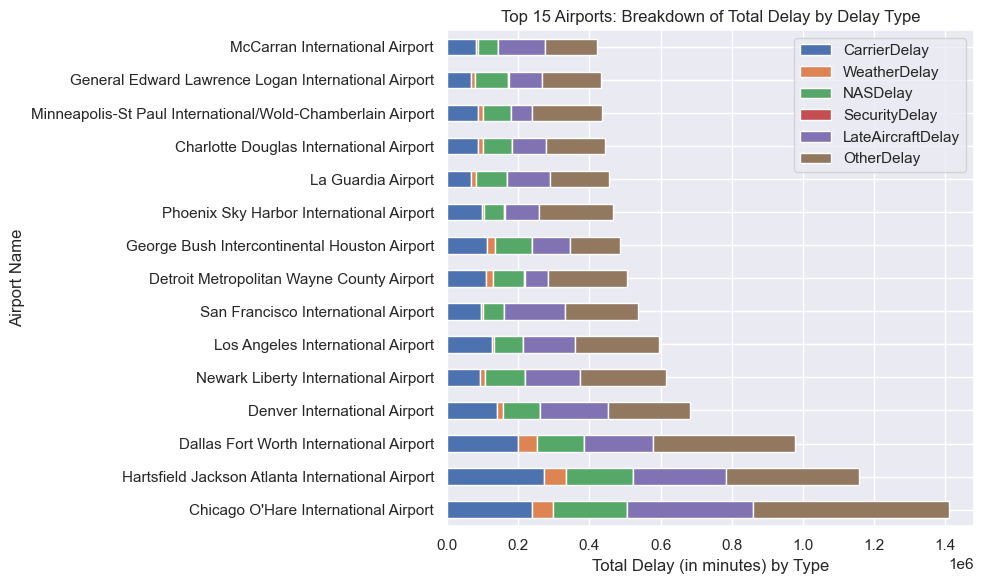

In [48]:
#Create a groupby to get the sum of delay causes per airline
delay_sums = df_delay_cause.groupby('Origin_Airport_Name')[['CarrierDelay',	'WeatherDelay',	'NASDelay',	'SecurityDelay', 'LateAircraftDelay', 'OtherDelay']].sum()

# Calculate the total delay for each origin airport
delay_sums['TotalDelay'] = delay_sums.sum(axis=1)

# Sort the DataFrame in descending order based on 'TotalDelay'
sorted_delay_sums = delay_sums.sort_values(by='TotalDelay', ascending=False)

# Create the plot
ax = sorted_delay_sums[['CarrierDelay',	'WeatherDelay',	'NASDelay',	'SecurityDelay', 'LateAircraftDelay', 'OtherDelay']].head(15).plot.barh(stacked=True,figsize=(10, 6))
ax.set_ylabel('Airport Name')
ax.set_xlabel('Total Delay (in minutes) by Type')
ax.set_title('Top 15 Airports: Breakdown of Total Delay by Delay Type')
plt.tight_layout()
plt.show()

We observe that the most significant causes of delays are

1. Other
2. A Late Aircraft
3. A Carrier Delay
4. A NAS Delay

On the other hand, we do not observe as many delays due to security reasons or weather conditions.